In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [76]:
np.set_printoptions(threshold=10)

## Dataset

In [77]:
X, y = datasets.load_iris(return_X_y=True)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (120, 4)
X_test shape :  (30, 4)
y_train shape :  (120,)
y_test shape :  (30,)


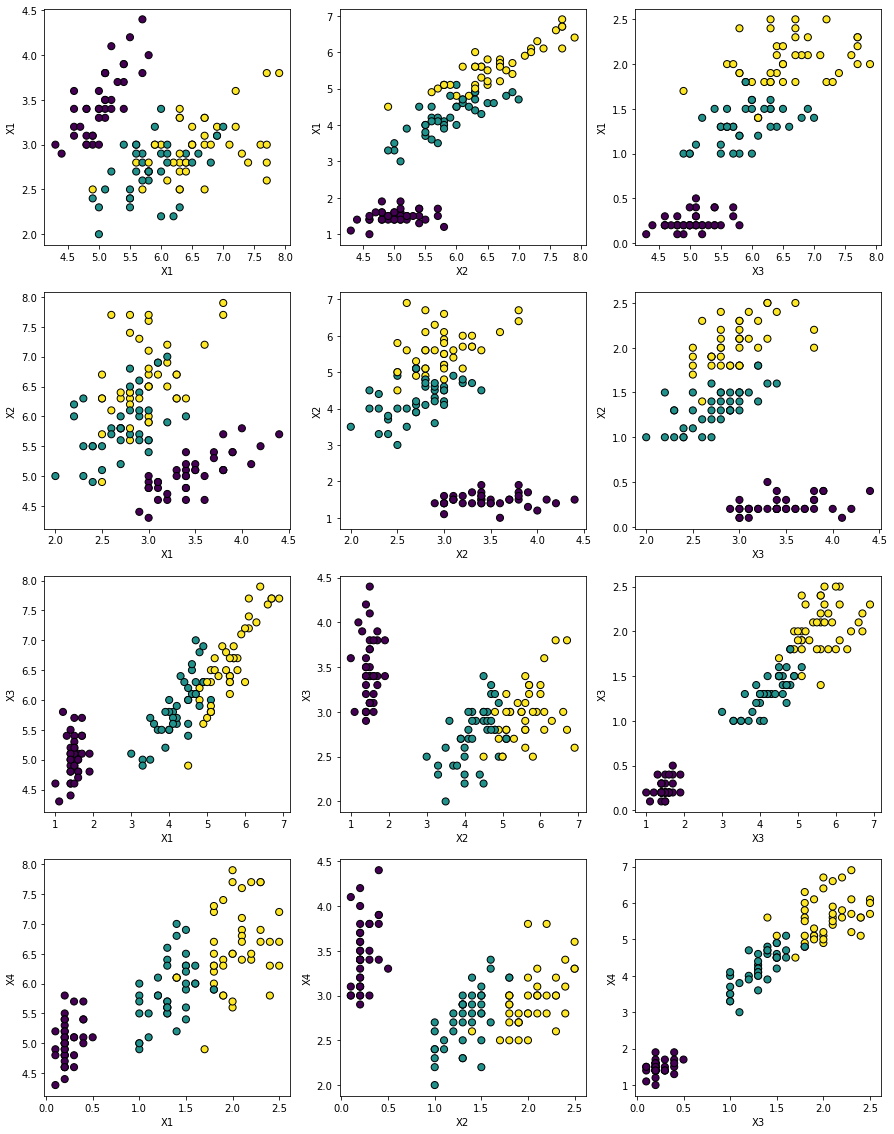

In [80]:
plt.figure(figsize=(15, 20))
n = 1
for i in range(4):
    x = [0, 1, 2, 3]
    x.remove(i)
    for j in range(3):
        plt.subplot(4, 3, n)
        plt.scatter(X_train[:, i], X_train[:, x[j]], c=y_train, ec='k', s=50)
        plt.xlabel(f'X{j + 1}')
        plt.ylabel(f'X{i + 1}')
        n += 1

## K-Nearest Neighbors Classification Model

In [81]:
class KNNeighborsClassifier:
    def __init__(self, n_neighbors=10):
        self.n_neighbors = n_neighbors
        self.__X = None
        self.__y = None
        
    def __euclidean_distance(self, x1, x2):
        return np.sum((x1 - x2) ** 2, axis=-1) ** 0.5 
    
    def predict(self, X):
        class_labels = []
        for x in X:
            distances = self.__euclidean_distance(x, self.__X)
            indices = np.argsort(distances)[1: self.n_neighbors + 1]
            predicted_class = int(np.mean(self.__y[indices]))
            class_labels.append(predicted_class)
        return np.array(class_labels)
        
    def fit(self, X, y):
        self.__X = X
        self.__y = y
    
    def evaluate(self, X, y):
        '''returns accuracy of the model'''
        y_pred = self.predict(X)
        accuracy = np.mean(np.equal(y, y_pred))
        return accuracy

## Training and Evaluation

In [82]:
model = KNNeighborsClassifier()

In [83]:
model.fit(X_train, y_train)

In [84]:
train_acc = model.evaluate(X_train, y_train)
print('training accuracy : ', train_acc)

training accuracy :  0.875


In [85]:
test_acc = model.evaluate(X_test, y_test)
print('testing accuracy : ', test_acc)

testing accuracy :  0.9333333333333333


## Finding the Best Model

Text(0, 0.5, 'accuracy')

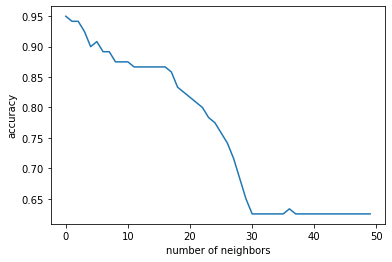

In [86]:
accuracy_per_k = []
for k in range(1, 51):
    model = KNNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_acc = model.evaluate(X_train, y_train)
    accuracy_per_k.append(train_acc)
plt.plot(accuracy_per_k)
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')

### Chosing K (Number of Neighbours) = 5 

In [87]:
model = KNNeighborsClassifier(n_neighbors=5)

In [88]:
model.fit(X_train, y_train)

In [89]:
train_acc = model.evaluate(X_train, y_train)
print('training accuracy : ', train_acc)

training accuracy :  0.9


In [90]:
test_acc = model.evaluate(X_test, y_test)
print('testing accuracy : ', test_acc)

testing accuracy :  0.9333333333333333


## Predictions

In [91]:
for i in range(X_train.shape[1])
    xnp.linspace(X_train[:, i].min() - 1, X_train[:, i].max() + 1, 100)
    

4

In [ ]:
plt.figure(figsize=(15, 20))
n = 1
for i in range(4):
    feature1 = X_train[:, i]
    x = [0, 1, 2, 3]
    x.remove(i)
    for j in range(3):
        plt.subplot(4, 3, n)
        feature2 = X_train[:, x[j]]
        plt.scatter(feature1, feature2, c=y_train, ec='k', s=50)
        
        xv = np.linspace(feature1.min() - 1, feature1.max() + 1, 1000)
        yv = np.linspace(feature2.min() - 1, feature2.max() + 1, 1000)
        X, Y = np.meshgrid(xv, yv)
        y_pred = model.predict(X.ravel(), Y.ravel(), )
        
        plt.contourf(X, Y, y_pred)
        plt.xlabel(f'X{x[j + 1]}')
        plt.ylabel(f'X{i + 1}')
        k += 1

In [68]:
xv = np.linspace(-5, 5, 100)
yv = np.linspace(-10, 10, 100)

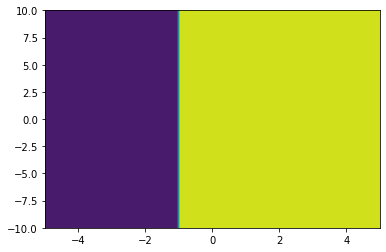

In [72]:
X, Y = np.meshgrid(xv, yv)
Z = X > -1
plt.contourf(X, Y, Z)